In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [34]:
base_dir = os.path.join('..','data_files')
clean_data = os.path.join(base_dir,'clean_data')
api_data = os.path.join(base_dir,'api_calls')
prep_data = os.path.join(base_dir,'prep_data')

lakes = ['Superior','Michigan','Huron','Erie','Ontario']

lake_colors_d = {'Superior':'blue',
                 'Michigan':'red',
                 'Huron':'green',
                 'Erie':'purple',
                 'Ontario':'orange'}

In [17]:
lake_stations = {}
for lake in lakes:
    file = f'{lake}_stations.csv'
    lake_stations[lake] = pd.read_csv(os.path.join(prep_data,file))['id'].tolist()
len(lake_stations)

5

In [5]:
total_api = pd.DataFrame()
for lake in lakes:
    file = f'{lake}_0-44_GSOM.csv'
    total_api = total_api.append(pd.read_csv(os.path.join(api_data,file)))
len(total_api)

1299802

In [13]:
total_api['date'] = pd.to_datetime(total_api['date'])
total_api['year'] = total_api['date'].dt.year
total_api['month'] = total_api['date'].dt.month
total_api['day'] = total_api['date'].dt.day
total_api['period'] = total_api['year'].map(str)+'-'+total_api['month'].map(str)
total_api.head()

,Unnamed: 0,date,datatype,station,attributes,value,year,month,day,perior,period
0,0,1973-01-01,DT32,GHCND:USC00200032,",0",27,1973,1,1,1973-1,1973-1
1,1,1973-01-01,DT32,GHCND:USC00200089,",0",30,1973,1,1,1973-1,1973-1
2,2,1973-01-01,DT32,GHCND:USC00200128,",0",28,1973,1,1,1973-1,1973-1
3,3,1973-01-01,DT32,GHCND:USC00200146,",0",29,1973,1,1,1973-1,1973-1
4,4,1973-01-01,DT32,GHCND:USC00200230,",0",27,1973,1,1,1973-1,1973-1


In [24]:
lake_data = {}
for lake in lakes:
    lake_data[lake] = total_api[total_api['station'].isin(lake_stations[lake])]
len(lake_data['Erie'])

332317

In [43]:
dx32 = {}
for lake in lakes:
    dx32[lake] = lake_data[lake][lake_data[lake]['datatype']=='DX32'].groupby('month').agg({'value':'median','station':'count'})
dx32['Erie'].head()

,value,station
month,,
1,14,34039
2,10,35275
3,3,35123
4,0,35217
5,0,25230


In [42]:
dt32 = {}
for lake in lakes:
    dt32[lake] = lake_data[lake][lake_data[lake]['datatype']=='DT32'].groupby('month').agg({'value':'median','station':'count'})
dt32['Erie'].head()

,value,station
month,,
1,28,29418
2,25,30307
3,21,30065
4,9,30318
5,0,20917


In [46]:
ice_coverage = pd.read_csv(os.path.join('..','data_files','ice_data','ice_coverage.csv'),index_col='Date')
max_coverage = ice_coverage[lakes].max()
max_coverage

KeyError: "None of [Index(['Superior', 'Michigan', 'Huron', 'Erie', 'Ontario'], dtype='object')] are in the [columns]"

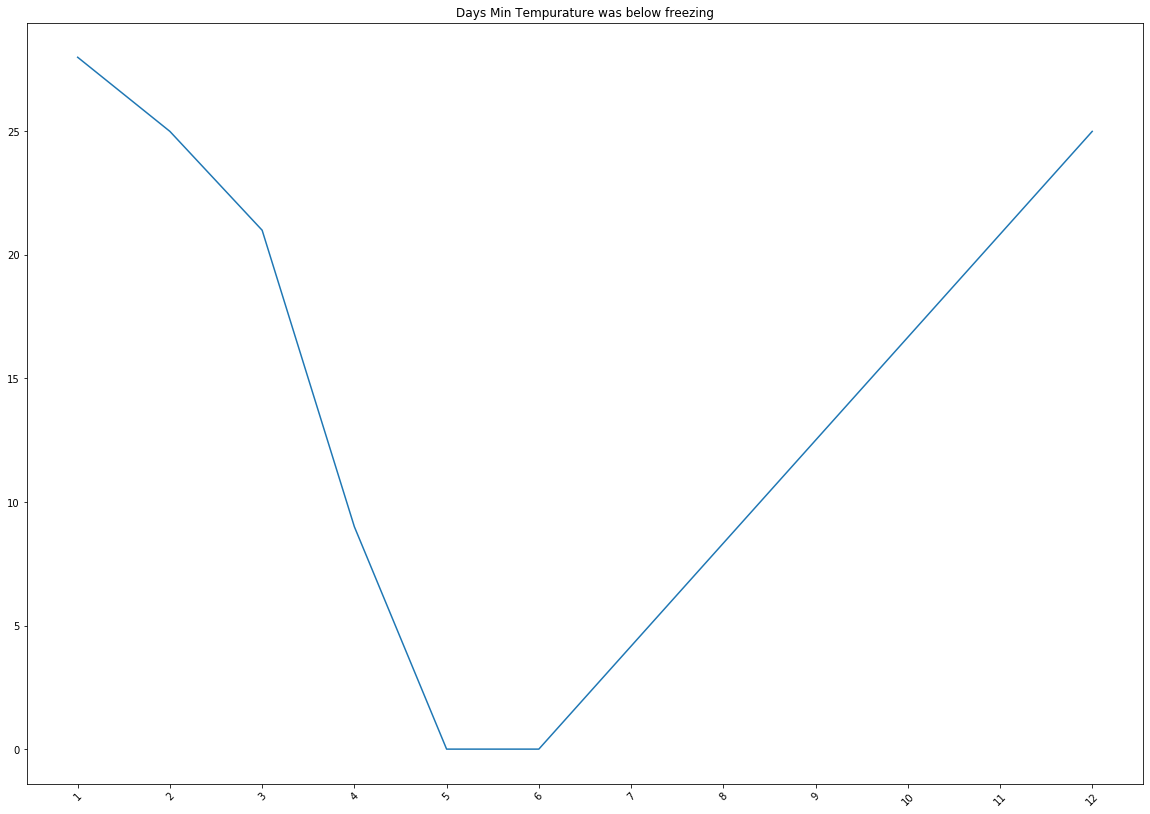

In [44]:
plt.figure(figsize=(20,14))
plt.title('Days Min Tempurature was below freezing')
plt.xticks(np.arange(min(dt32['Erie'].index),max(dt32['Erie'].index)+2),rotation=45)
plt.plot(dt32['Erie'].index,dt32['Erie']['value'])